### statsmodel https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html

In [45]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [46]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [47]:
def perform_adf_test(series):
    result=adfuller(series)
    print(f"ADF Statistic:{result[0]}")
    print(f"p-value:{result[1]}")

In [48]:
#get data
series = pd.read_csv('./datasets/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

C:\Users\cmjid\AppData\Local\Temp\ipykernel_16124\2746222234.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./datasets/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [49]:
series.head()

Date
2004-03-01   -1067.0
2004-04-01   -4131.0
2004-05-01    3543.0
2004-06-01     401.0
2004-07-01    -405.0
Freq: MS, Name: Total, dtype: float64

In [50]:
perform_adf_test(series)

ADF Statistic:-7.162321332721395
p-value:2.9462095956893204e-10


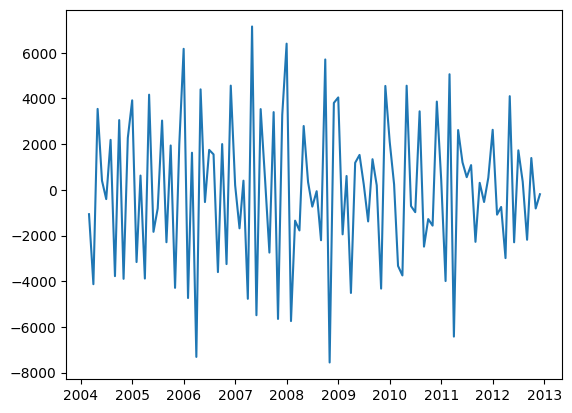

In [51]:
plt.plot(series)

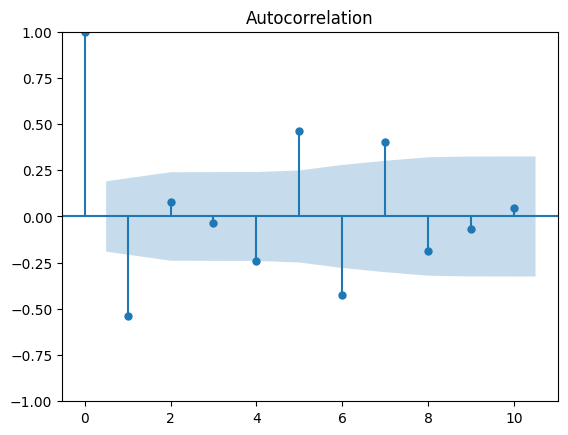

In [52]:
plot_acf(series, lags=10)
plt.show()

C:\Users\cmjid\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


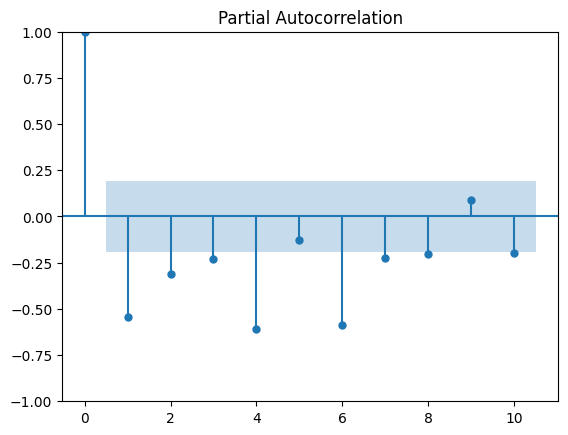

In [53]:
plot_pacf(series, lags=10)
plt.show()

### ARMA https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_1.html

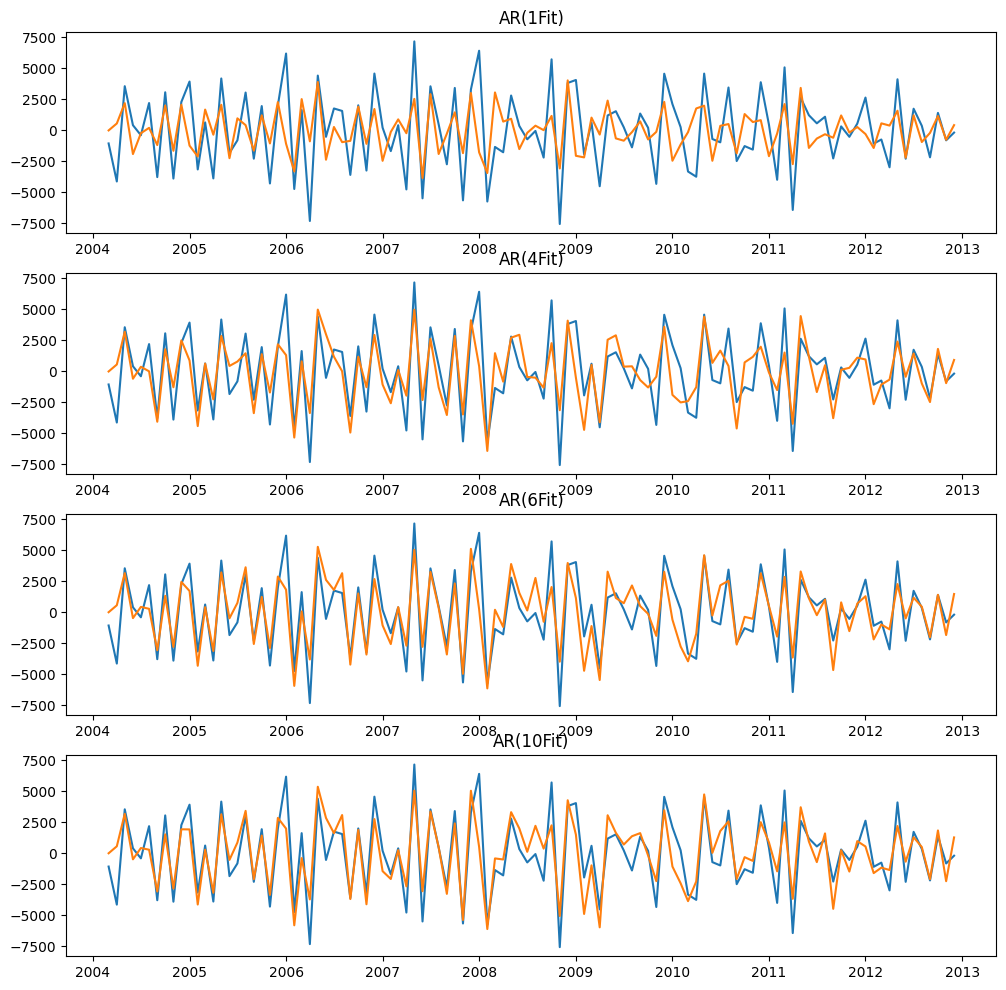

In [56]:
plt.figure(figsize=(12,12))

ar_orders=[1,4,6,10]
fitted_model_dict={}


for idx, ar_order in enumerate(ar_orders):
    #create AR(p)모델
    ar_model=ARIMA(series, order=(ar_order,0,0))
    ar_model_fit=ar_model.fit()
    fitted_model_dict[ar_order]=ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title(f'AR({ar_order}Fit)')
    
    

In [57]:
for ar_order in ar_orders:
    print(f'AIC for ar({ar_order}): {fitted_model_dict[ar_order].aic}')

AIC for ar(1): 1980.860621744531
AIC for ar(4): 1927.609985266004
AIC for ar(6): 1899.6497442199582
AIC for ar(10): 1902.37654499951
